In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Load train dataset

In [2]:
data = pd.read_csv("../data/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into training and dev sets

In [5]:
data

array([[4, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]], shape=(42000, 785))

#### Dev set

In [6]:
data_dev = data[0:1000].T # T for transposing as each column is number features
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # scaling X between 0 and 1

In [7]:
print(X_dev.shape)
X_dev[:10]

(784, 1000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 1000))

In [8]:
print(Y_dev.shape)
Y_dev[:10]

(1000,)


array([4, 2, 6, 7, 7, 9, 6, 1, 6, 7])

#### Training set

In [9]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [10]:
print(X_train.shape)
X_train[:10]

(784, 41000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 41000))

In [11]:
print(Y_train.shape)
Y_train[:10]

(41000,)


array([8, 7, 9, 3, 7, 3, 7, 7, 9, 6])

### Define our Neural Network

Our NN will have a simple two-layer architecture. Input layer a<sup>[0]</sup> will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  𝑎<sup>[1]</sup>
  will have 10 units with ReLU activation, and finally our output layer  𝑎<sup>[2]</sup>
  will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$Z^{[1]} = W^{[1]}X + b^{[1]}$

$A^{[1]} = g_{ReLU}(Z^{[1]})$

$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$

$A^{[2]} = g_{softmax}(Z^{[2]})$

**Backward propagation**

$dZ^{[2]} = A^{[2]} - Y$

$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

$dB^{[2]} = \frac{1}{m} \Sigma dZ^{[2]}$

$dZ^{[1]} = W^{[2]T} dZ^{[2]} \cdot* g^{[1]'}(z^{[1]})$

$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$

$dB^{[1]} = \frac{1}{m} \Sigma dZ^{[1]}$

**Parameter updates**

$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$

$b^{[2]} := b^{[2]} - \alpha db^{[2]}$

$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$

$b^{[1]} := b^{[1]} - \alpha db^{[1]}$

### Vars and shapes

**Forward prop**

- $A^{[0]} = X$: 784 x m

- $Z^{[1]} \sim A^{[1]}$: 10 x m

- $W^{[1]}$: 10 x 784 (as $W^{[1]}A^{[0]} \sim Z^{[1]}$)

- $B^{[1]}$: 10 x 1

- $Z^{[2]} \sim A^{[2]}$: 10 x m

- $W^{[2]}$: 10 x 10 (as $W^{[2]}A^{[1]} \sim Z^{[2]}$)

- $B^{[2]}$: 10 x 1

**Backprop**

- $dZ^{[2]}$: 10 x m ($A^{[2]}$)

- $dW^{[2]}$: 10 x 10

- $dB^{[2]}$: 10 x 1

- $dZ^{[1]}$: 10 x m ($A^{[1]}$)

- $dW^{[1]}$: 10 x 784

- $dB^{[1]}$: 10 x 1

#### Forward Prop

In [12]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [13]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [14]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [15]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#### Backward Prop

In [16]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1 ))
    one_hot_Y[np.arange(Y.size), Y] = 1  # places a 1 in the correct column (representing the class label) for each row (representing a data point).
    one_hot_Y = one_hot_Y.T  # now each row of one_hot_Y corresponds to a class, and each column corresponds to a data point
    return one_hot_Y

In [34]:
def ReLU_deriv(Z):
    return Z > 0  # This will output 1 if Z bigger that zero (relu in positive side of x axis) and 0 if not (remember relu function shape for better intuition)

In [18]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2 * ReLU_deriv(Z1))
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [19]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # our tiny steps down the hill
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [20]:
def get_predictions(A2):
    # return max value afte our softmax
    return np.argmax(A2, 0)

In [21]:
def get_accuracy(predictions, Y):
    # For printing accuracy of model through iterations
    print(predictions, Y) #pring model output Ys and Y_hat (real Ys)
    return np.sum(predictions == Y) / Y.size

In [22]:
def gradient_descent(X, Y, iterations, alpha):
    # Walking Down The Hill
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0): # printing model results every 10th iteration
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y), "\n")
    return W1, b1, W2, b2

#### Let's Train

In [23]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.10)

Iteration:  0
[2 2 2 ... 0 2 2] [8 7 9 ... 1 7 8]
Accuracy:  0.08197560975609756 

Iteration:  10
[8 3 8 ... 1 2 3] [8 7 9 ... 1 7 8]
Accuracy:  0.18109756097560975 

Iteration:  20
[8 7 1 ... 1 7 3] [8 7 9 ... 1 7 8]
Accuracy:  0.2979512195121951 

Iteration:  30
[8 7 1 ... 1 7 3] [8 7 9 ... 1 7 8]
Accuracy:  0.38714634146341464 

Iteration:  40
[8 7 1 ... 1 7 3] [8 7 9 ... 1 7 8]
Accuracy:  0.44921951219512196 

Iteration:  50
[8 7 1 ... 1 7 3] [8 7 9 ... 1 7 8]
Accuracy:  0.4942682926829268 

Iteration:  60
[8 7 1 ... 1 7 3] [8 7 9 ... 1 7 8]
Accuracy:  0.5295609756097561 

Iteration:  70
[8 7 1 ... 1 7 3] [8 7 9 ... 1 7 8]
Accuracy:  0.5620487804878049 

Iteration:  80
[8 7 1 ... 1 7 3] [8 7 9 ... 1 7 8]
Accuracy:  0.5903414634146341 

Iteration:  90
[8 7 1 ... 1 7 3] [8 7 9 ... 1 7 8]
Accuracy:  0.6141707317073171 

Iteration:  100
[8 7 1 ... 1 7 8] [8 7 9 ... 1 7 8]
Accuracy:  0.6334878048780488 

Iteration:  110
[8 7 1 ... 1 7 8] [8 7 9 ... 1 7 8]
Accuracy:  0.6515121951219512 


*with 1000 iterations the model accuracy is about 80 percent (82.5)* \
ps: my neural network architecture could be more complex with more layers and neurons (right now my model is high bias compare to state of the art handwritten digit recognition neural networks) \
or even using CNN, vision-transformers and etc but I wanted to build a neural network from scratch with raw algebra and math for educational purposes and gain better intuition about neural networks

### Test the model on dev set

In [24]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [25]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 2 6 7 3 9 6 1 6 7 7 3 6 9 7 3 6 3 9 6 8 2 5 0 6 2 8 0 6 6 7 5 3 4 5 6 1
 6 2 4 0 6 9 2 4 8 5 7 3 4 8 7 8 2 6 1 8 3 1 9 2 9 9 3 7 0 3 3 7 4 6 7 7 4
 3 4 5 1 1 1 6 2 1 2 3 8 5 9 4 1 3 8 2 6 6 8 1 0 7 1 4 3 0 8 9 5 8 9 8 1 1
 6 3 9 3 1 5 9 4 1 7 1 9 6 6 6 1 6 8 9 1 0 0 6 1 7 1 4 1 5 3 0 0 2 0 5 4 5
 9 7 3 4 7 1 9 0 5 3 0 1 9 5 7 0 2 7 5 6 3 7 8 0 2 3 3 0 6 7 9 1 9 4 4 6 6
 3 5 2 9 4 8 1 8 6 9 8 4 1 1 1 1 2 2 9 9 7 1 2 8 1 9 7 8 4 8 3 7 4 0 5 8 0
 1 9 1 7 8 1 6 6 9 1 8 9 6 8 8 4 2 6 9 2 1 5 3 3 0 4 0 1 3 8 2 9 6 3 9 6 0
 3 8 4 6 9 5 4 3 5 9 9 2 1 0 2 9 7 2 3 7 8 2 6 2 9 1 9 0 8 7 1 4 5 6 9 6 0
 8 4 9 6 7 0 1 6 8 3 3 0 7 4 5 0 4 7 4 8 1 1 8 6 4 1 3 7 5 1 1 2 5 0 1 2 8
 6 1 4 0 8 2 9 1 9 0 1 3 4 0 2 4 4 3 1 7 5 1 2 6 8 8 5 9 8 6 7 4 4 1 3 8 6
 8 5 2 1 3 2 3 9 0 1 6 5 5 8 1 3 5 8 3 9 7 5 0 4 8 0 0 9 0 3 0 1 4 1 9 8 6
 0 6 0 1 8 2 0 5 0 5 2 8 3 1 1 0 6 9 1 5 0 1 1 8 7 1 5 4 1 3 9 2 9 6 5 6 1
 7 0 2 5 2 0 1 0 4 9 8 8 4 4 6 0 3 3 4 5 1 8 8 9 3 8 2 4 9 6 8 7 3 2 6 1 3
 8 1 4 9 5 0 0 2 9 9 7 9 

np.float64(0.79)

*got 82.9 percent on dev set* \
This number (+0.4 percent) show a well balanced model in Bias-Variance trade-off

### Look at some example

In [26]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show

Prediction:  [9]
label:  9


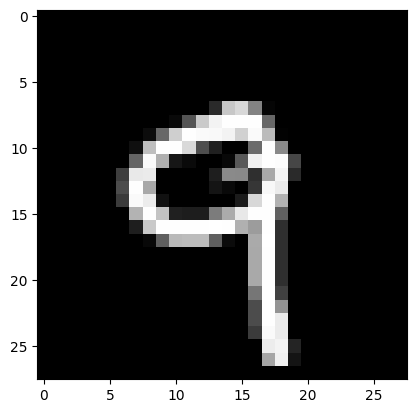

In [27]:
test_prediction(41, W1, b1, W2, b2)